<a href="https://colab.research.google.com/github/IIAnirudhII/BU/blob/master/Deep%20Learning/Lab4/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [393]:
import pandas as pd

In [394]:
a_file = open("/content/drive/My Drive/Dataset/Texts/lab 4 dataset.txt", "r+")

In [395]:
from keras.preprocessing.text import text_to_word_sequence
lst=[]
for i in a_file:
  lst.append(text_to_word_sequence(i))

In [396]:
y=[]
for i in range(len(lst)):
  y.append(lst[i].pop())

In [397]:
for i in range(len(lst)):
  lst[i]=" ".join(lst[i])

In [398]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
for i in range(len(lst)):
  word_tokens = word_tokenize(lst[i])
  filtered_sentence = [] 
  
  for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
  lst[i] = filtered_sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [399]:
unique=[]
for i in lst:
  for j in i:
    if(j not in unique):
      unique.append(j)

In [400]:
for i in range(len(lst)):
  lst[i]=" ".join(lst[i])

In [401]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = lst
df = pd.DataFrame(data=corpus, columns=['sentences'])

vectorizer = CountVectorizer(vocabulary=unique, min_df=0 , stop_words=frozenset(), token_pattern=r"(?u)\b\w+\b")
X = vectorizer.fit_transform(df['sentences'].values)
result = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())


In [402]:
X=np.array(result)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [403]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [404]:
class TestCallback():
    def __init__(self, test_data):
        self.test_data = X_test

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

In [405]:
import tensorflow.keras as keras
import tensorflow as tf
import time

train_accuracy=[]
test_accuracy=[]
runtime_test=[]

for i in range(3,11):

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(2**i, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

  model.compile(optimizer ='adam' , loss = 'binary_crossentropy' ,metrics =['accuracy'])
  model.fit(X_train , y_train , epochs = 100)

  val_loss_train, val_acc_train = model.evaluate(X_train, y_train)
  train_accuracy.append(val_acc_train)

  start_time = time.time()
  val_loss_test, val_acc_test = model.evaluate(X_test, y_test)
  test_accuracy.append(val_acc_test)
  runtime_test.append((time.time() - start_time))

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7253 - accuracy: 0.2667
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7241 - accuracy: 0.2667
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7229 - accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7195 - accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.3333
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7174 - accuracy: 0.3333
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.3333
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7154 - accuracy: 0.3333
Epoch 11/100
1/1 [===========

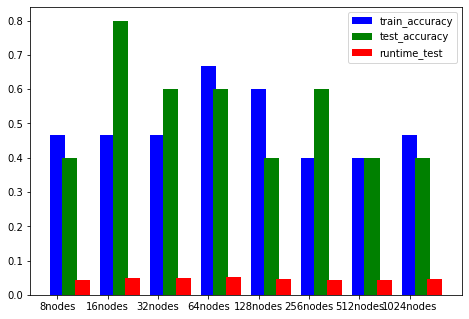

In [406]:
import matplotlib.pyplot as plt
data = [train_accuracy, test_accuracy, runtime_test]
X = np.arange(8)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.3 , tick_label=["8nodes","16nodes","32nodes", "64nodes","128nodes","256nodes","512nodes","1024nodes"])
ax.bar(X + 0.25, data[1], color = 'g', width = 0.3)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.3)
ax.legend(labels=['train_accuracy', 'test_accuracy','runtime_test'])

In [407]:
print('Accuracy: %.2f' % (max(test_accuracy)*100))

Accuracy: 80.00


In [408]:
import tensorflow.keras as keras
import tensorflow as tf
import time

train_accuracy=[]
test_accuracy=[]
runtime_test=[]

for i in range(2,6):

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(i, activation=tf.nn.softmax))

  model.compile(optimizer ='adam' , loss = 'binary_crossentropy' ,metrics =['accuracy'])
  model.fit(X_train , y_train , epochs = 100)

  val_loss_train, val_acc_train = model.evaluate(X_train, y_train)
  train_accuracy.append(val_acc_train)

  start_time = time.time()
  val_loss_test, val_acc_test = model.evaluate(X_test, y_test)
  test_accuracy.append(val_acc_test)
  runtime_test.append((time.time() - start_time))

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7012 - accuracy: 0.2667
Epoch 6/100
1/1 [==============================] - 0s 987us/step - loss: 0.7005 - accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.3333
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.3333
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4000
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4000
Epoch 11/100
1/1 [=========

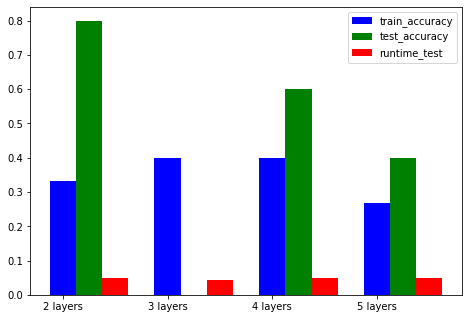

In [409]:
data = [train_accuracy, test_accuracy, runtime_test]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25,tick_label=["2 layers","3 layers","4 layers", "5 layers"])
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.legend(labels=['train_accuracy', 'test_accuracy','runtime_test'])

In [410]:
print('Accuracy: %.2f' % (max(test_accuracy)*100))

Accuracy: 80.00
